## 95. Unique Binary Search Trees II  
Medium  
Topics  
Companies  
Given an integer n, return all the structurally unique BST's (binary search trees), which has exactly n nodes of unique values from 1 to n. Return the answer in any order.  

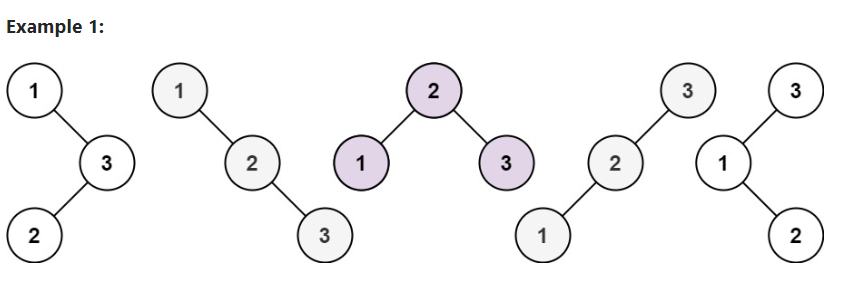

Input: n = 3  
Output: [[1,null,2,null,3],[1,null,3,2],[2,1,3],[3,1,null,null,2],[3,2,null,1]]  
Example 2:  

Input: n = 1  
Output: [[1]]  
 

Constraints:  
 
1 <= n <= 8  

## Recursive Solution
### Solution Intuition:  We will use recursive soltuion where , we iterate from start node(value) to end node value .and call recusrion to generate trees on (start to root value -1) and another recursive call to genrate(root value + 1 to end). And then we iterate of leftree in leftress and right tree in trees and constrct a root using TreeNode Class, by providing root value , leftree, righttree as arguments . and then append the cfreted root in a list  and return that list

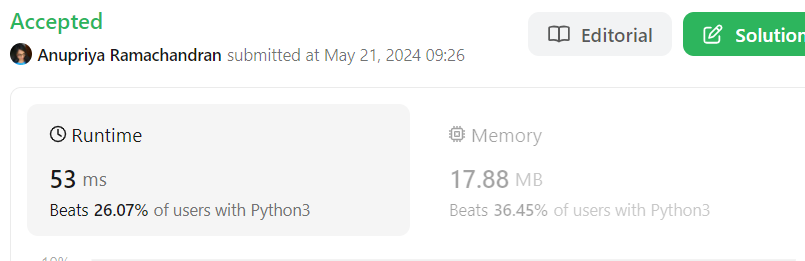

In [5]:
from typing import List, Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        return self.generate(1, n)

    def generate(self, left, right):
        if left > right:
            return [None]

        if left == right:
            return [TreeNode(left)]

        trees = []
        for root_val in range(left, right + 1):
            left_trees = self.generate(left, root_val -1)
            right_trees = self.generate(root_val + 1, right)

            for left_tree in left_trees:
                for right_tree in right_trees:
                    root = TreeNode(root_val, left_tree, right_tree)
                    trees.append(root)

        return trees

## Recursion with meomization
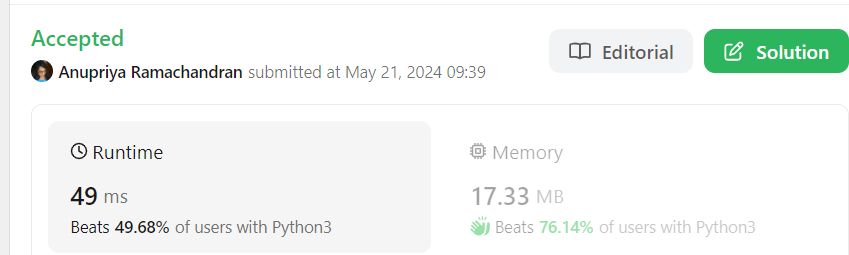

In [6]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        dp = {}
        return self.generate(1, n, dp)

    def generate(self, left, right, dp):
        trees = dp.get((left, right))
        if trees != None:
            return trees

        
        if left > right:
            return [None]

        if left == right:
            return [TreeNode(left)]

        trees = []
        for root_val in range(left, right + 1):
            left_trees = self.generate(left, root_val -1, dp)
            right_trees = self.generate(root_val + 1, right, dp)

            for left_tree in left_trees:
                for right_tree in right_trees:
                    root = TreeNode(root_val, left_tree, right_tree)
                    trees.append(root)

        dp[(left, right)] = trees

        return dp[(left, right)]